In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf

register_matplotlib_converters()

In [7]:
df = yf.download('^NSEI', start='2013-01-01', end='2023-01-01') 
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['Squared_Returns'] = df['Log_Returns'] ** 2

[*********************100%***********************]  1 of 1 completed


Volatility clustering, a key feature GARCH models capture, manifests in the squared returns.

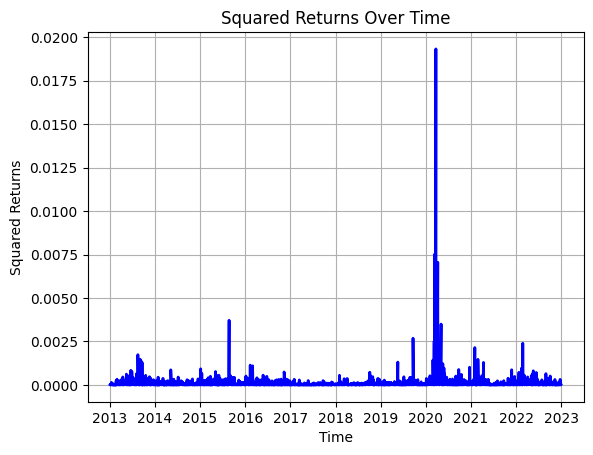

In [15]:
plt.plot(df['Squared_Returns'], color='blue', linestyle='-', linewidth=2)
plt.title('Squared Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Squared Returns')
plt.grid(True)
plt.show()

Returns can be positive or negative, but volatility is directionless. Squaring the returns ensures that both positive and negative values contribute equally to the measure of variability.

GARCH and similar models rely on squared returns to model variance (volatility) over time.
Squared returns reflect volatility clustering—a key property in financial time series, where high-volatility periods tend to follow each other.

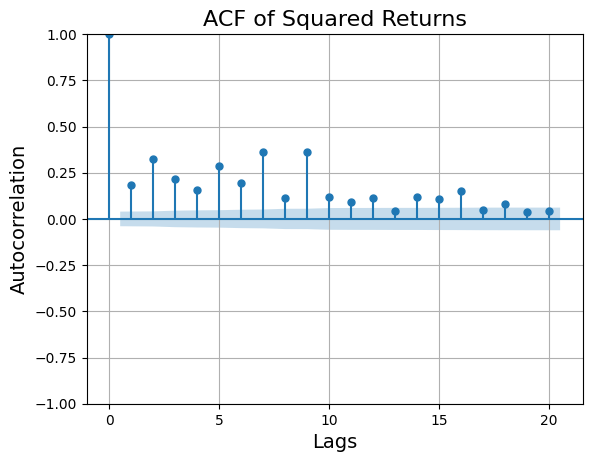

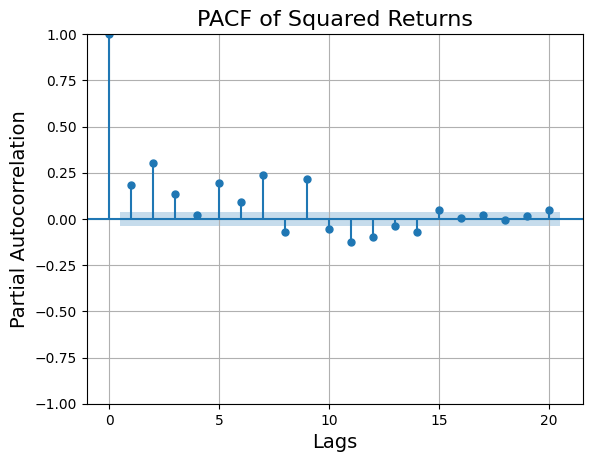

In [22]:
plot_acf(df['Squared_Returns'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF of Squared Returns', fontsize=16)
plt.xlabel('Lags', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.show()

plot_pacf(df['Squared_Returns'].dropna(), lags=20, method='ywm', ax=plt.gca())
plt.title('PACF of Squared Returns', fontsize=16)
plt.xlabel('Lags', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)
plt.grid(True)
plt.show()